# 图像特征计算
* 提取OLGIM三分类数据集图像的浅层特征
* 主要包括**灰度直方图特征（均值、方差等）**和**纹理特征（熵、能量、相关性等）**
* 建立机器学习分类模型。

In [9]:
import os
import cv2
import numpy as np

def calculate_gray_features(image):
    # 将图像转换为灰度图
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 计算灰度均值和方差
    gray_mean = np.mean(gray_img)
    gray_var = np.var(gray_img)

    # 计算灰度直方图
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    hist /= hist.sum()  # 归一化

    # 计算图像熵
    entropy = -np.sum(hist * np.log2(hist + 1e-8))

    # 计算图像能量
    energy = np.sum(hist ** 2)

    # 计算图像相关性
    M, N = gray_img.shape
    i, j = np.meshgrid(np.arange(N), np.arange(M))
    mu = np.mean(gray_img)
    nu = np.mean(i * gray_img) / mu
    corr = np.sum((i - mu) * (j - nu) * gray_img) / (M * N * np.sqrt(np.var(gray_img)) * np.sqrt(np.var(i * gray_img)))

    return gray_mean, gray_var, entropy, energy, corr


def normalize_features(features):
    max_val = np.max(features)
    min_val = np.min(features)

    # 处理特殊情况: 如果最大值和最小值相等，则将所有特征设置为0
    if max_val == min_val:
        return np.zeros_like(features)

    normalized_features = (features - min_val) / (max_val - min_val)
    return normalized_features


def batch_calculate_features(folder_path, output_file):
    # 遍历文件夹中的所有图像文件
    file_list = os.listdir(folder_path)

    with open(output_file, 'w') as f:
        for file_name in file_list:
            if file_name.endswith(".jpg") or file_name.endswith(".png"):
                # 读取图像文件
                image_path = os.path.join(folder_path, file_name)
                img = cv2.imread(image_path)

                # 计算特征值
                gray_mean, gray_var, entropy, energy, corr = calculate_gray_features(img)

                # 舍入到两位小数
                gray_mean = round(gray_mean)
                gray_var = round(gray_var, 2)
                entropy = round(entropy, 2)
                energy = round(energy, 5)
                corr = round(corr, 5)

                # 归一化特征值
                # gray_mean = normalize_features(gray_mean)
                # gray_var = normalize_features(gray_var)
                # entropy = normalize_features(entropy)
                # energy = normalize_features(energy)
                # corr = normalize_features(corr)

                # 写入文本文件
                f.write("{} {} {} {} {} {} 0\n".format(file_name, gray_mean, gray_var, entropy, energy, corr))
                # f.write("Image: {}\n".format(file_name))
                # f.write("Gray Mean: {}\n".format(gray_mean))
                # f.write("Gray Variance: {}\n".format(gray_var))
                # f.write("Entropy: {}\n".format(entropy))
                # f.write("Energy: {}\n".format(energy))
                # f.write("Correlation: {}\n".format(corr))
                # f.write("\n")


# 调用函数并传入文件夹路径和输出文件路径
folder_path = "jpg0"
output_file = "jpg0.txt"
batch_calculate_features(folder_path, output_file)


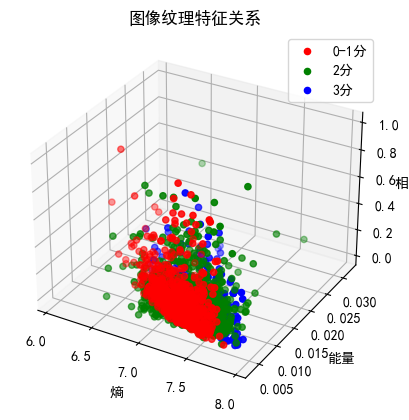

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_excel('all.xlsx')
features = data.iloc[:, 2:5].values
categories = data.iloc[:, 5].values

colors = ['r', 'g', 'b']
fig = plt.figure()
plt.rcParams['font.family'] = 'SimHei'

ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    class_indices = (categories == i)  
    ax.scatter(features[class_indices, 0], 
               features[class_indices, 1], 
               features[class_indices, 2], 
               c=colors[i])

ax.set_xlabel('熵')
ax.set_ylabel('能量')
ax.set_zlabel('相关性')
ax.legend(['0-1分', '2分', '3分'])
ax.set_title('图像纹理特征关系')
plt.show()

In [8]:
categories

array([0.01051, 0.00808, 0.00868, ..., 0.00776, 0.00639, 0.00807])